# DNN: the Basics

In this notebook, we will learn the basics of a Deep Neural Network (DNN). 

We will use the `fashion-mnist` dataset, which is useful for quick examples when learning the basics.

In [1]:
# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# helpers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

2022-02-14 09:46:42.772026: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


---

# The dataset

To start with, we load the `fashion-mnist` dataset from Keras:

In [6]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# normalise images
train_images = train_images / 255.0
test_images = test_images / 255.0

# string labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# print info
print("Number of training data: %d" % len(train_labels))
print("Number of test data: %d" % len(test_labels))
print("Image pixels: %s" % str(train_images[0].shape))
print("Number of classes: %d" % (np.max(train_labels) + 1))

Number of training data: 60000
Number of test data: 10000
Image pixels: (28, 28)
Number of classes: 10


We can randomly plot some images and their labels:

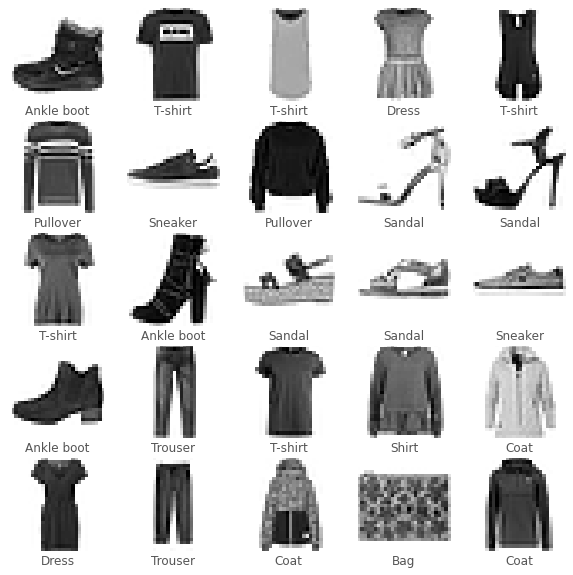

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

---

# Classification by DNN

Here we will create and train a DNN model to classify the images in `fashion-mnist`. With Keras, the task can be divided into three essential steps:

1. Build the network architecture;
2. Compile the model;
3. Train the model.

These steps may be repeated for a few times to improve the quality (accuracy and stability) of the model.

## Build the network architecture

Our first DNN will be a simple multi-layer perceptron with only one hidden layer.


In general, a network of this kind should include an input layer, some hidden layers and an output layer. In this example, all the layers will be `Dense` layers.


### The input layer

In this case, we flatten (using a `Flatten` layer) the images and feed them to the network. As the images are 28 $\times$ 28 in pixels, the input size will be 784.


### The hidden layers

We use one hidden layer in this case and use `ReLU` as its activation function:

> $R(x)=\max(0,x)$


### The output layer

We usually encode categorical data as a "one-hot" vector. In this case, we have a vector of length 10 on the output side, where each element corresponds to a class. Ideally, we hope the values to be either 1 or 0, with 1 for the correct class and 0 for the others, so we use `sigmoid` as the activation function for the output layer:

> $S(x) = \dfrac{1}{1 + e^{-x}}$

In [10]:
# build the network architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

We can take a look at the summary of the model using `model.summary()`. 

In [11]:
# print summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
# compile the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.

### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [13]:
# train the model
training_history = model.fit(train_images, train_labels, epochs=50, batch_size=32, 
                             validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5209 - accuracy: 0.8186 - val_loss: 0.4605 - val_accuracy: 0.8335
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8611 - val_loss: 0.4045 - val_accuracy: 0.8564
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3476 - accuracy: 0.8736 - val_loss: 0.3782 - val_accuracy: 0.8648
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.8832 - val_loss: 0.3810 - val_accuracy: 0.8643
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3026 - accuracy: 0.8885 - val_loss: 0.3575 - val_accuracy: 0.8719
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2858 - accuracy: 0.8939 - val_loss: 0.3440 - val_accuracy: 0.8767
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2721 - accuracy: 0.8991 - val_loss: 0.3398 - val_accuracy:

### Check training history

We can examine the training history by plotting accuracy and loss against epoch for both the training and the test data. 

Notice that the accuracies for the training and the test data diverge as the model trains. This is a classic symptom of [overfitting](https://en.wikipedia.org/wiki/Overfitting), that is, our model corresponds too closely to the training data so that it cannot fit the test data with an equivalent accuracy.

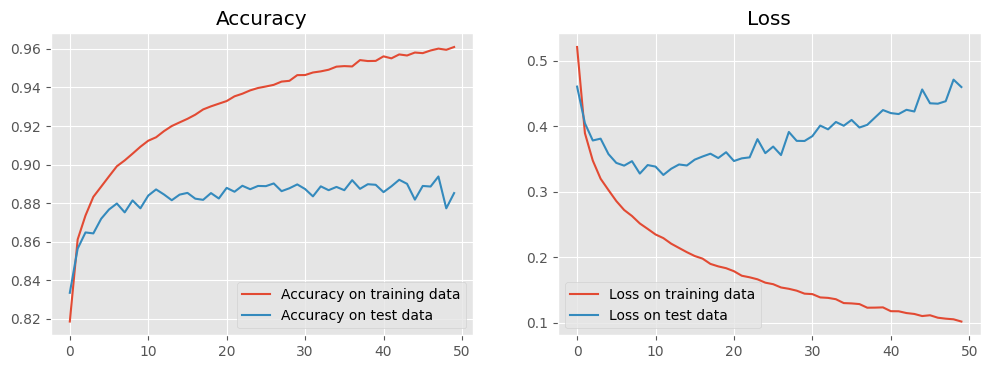

In [15]:
# plot accuracy
plt.figure(dpi=100, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Accuracy on training data')
plt.plot(training_history.history['val_accuracy'], label='Accuracy on test data')
plt.legend()
plt.title("Accuracy")

# plot loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Loss on training data')
plt.plot(training_history.history['val_loss'], label='Loss on test data')
plt.legend()
plt.title("Loss")
plt.show()

## Regularise and re-train

Dropout is a regularisation technique to protect against overfitting by randomly omitting a certain amount of neurons from a layer. Here we will rebuild our model with `Dropout` between the hidden and the output layers. 

In [16]:
# build the network architecture
model_reg = Sequential()
model_reg.add(Flatten(input_shape=(28, 28)))
model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dropout(0.4))
model_reg.add(Dense(10, activation='sigmoid'))

# compile the model
model_reg.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

In [ ]:
# train the model
training_history_reg = model_reg.fit(train_images, train_labels, epochs=50, batch_size=32, 
                                     validation_data=(test_images, test_labels))

In [ ]:
# plot accuracy
plt.figure(dpi=100, figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history_reg.history[acc_str], label='Accuracy on training data')
plt.plot(training_history_reg.history['val_' + acc_str], label='Accuracy on test data')
plt.plot(training_history.history['val_' + acc_str], label='Accuracy on test data (no dropout)')
plt.legend()
plt.title("Accuracy")

# plot loss
plt.subplot(1, 2, 2)
plt.plot(training_history_reg.history['loss'], label='Loss on training data')
plt.plot(training_history_reg.history['val_loss'], label='Loss on test data')
plt.plot(training_history.history['val_loss'], label='Loss on test data (no dropout)')
plt.legend()
plt.title("Loss")
plt.show()

## Make predictions

Finally, we can use our trained model to make predictions. 

In [22]:
# use test images to make predictions
pred_labels = model.predict(test_images).argmax(axis=1)

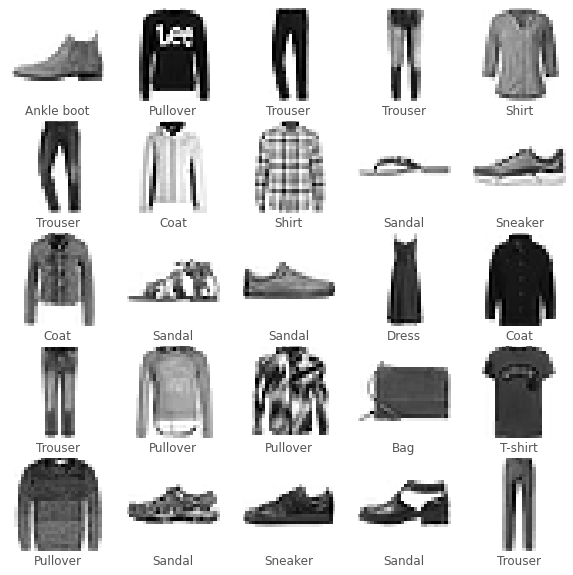

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[pred_labels[i]])
plt.show()